**Задача 1**

$$Q = \frac{1}{2}||Ka - y||^2 + \frac{\lambda}{2}a^TKa \rightarrow \min$$

Выпишем полный дифференциал

$$dQ = \frac{1}{2}d\big((Ka - y)^T(Ka - y)\big) + \frac{\lambda}{2}d(a^TKa) =$$

$$= \frac{1}{2}\bigg(d\big((Ka - y)^T\big)(Ka - y) + (Ka - y)^Td(Ka - y)\bigg) + \frac{\lambda}{2}\big(d(a^TK)a + a^TKda\big) =$$

$$= \frac{1}{2}\bigg(\big(d(Ka - y)\big)^T(Ka - y) + (Ka - y)^TKda\bigg) + \frac{\lambda}{2}\big((da)^TKa + a^TKda\big) =$$

$$= \frac{1}{2}\bigg(\big(Kda\big)^T(Ka - y) + (Ka - y)^TKda\bigg) + \frac{\lambda}{2}\big((da)^TKa + a^TKda\big) =$$

$$= \frac{1}{2}\bigg(da^TK^T(Ka - y) + (Ka - y)^TKda\bigg) + \frac{\lambda}{2}\big((da)^TKa + a^TKda\big) =$$

Можно посмотреть на размерности $da^TK^T(Ka - y)$ и $(da)^TKa$ и понять, что это скаляры, а значит из можно безболезненно транспонировать

$$= \frac{1}{2}\bigg((Ka - y)^TK^Tda + (Ka - y)^TKda\bigg) + \frac{\lambda}{2}\big(a^TK^Tda + a^TKda\big) =$$

Ещё можно вспомнить, что $K$ симметричная, так как состоит из скалярных произвдвений пар объектов, соответствующих строке и столбцу

$$= \frac{1}{2}\bigg((Ka - y)^TKda + (Ka - y)^TKda\bigg) + \frac{\lambda}{2}\big(a^TKda + a^TKda\big) =$$

$$= \frac{1}{2}2(Ka - y)^TKda + \frac{\lambda}{2}2a^TKda =$$

$$= (Ka - y)^TKda + \lambda a^TKda =$$

$$= \big((Ka - y)^TK + \lambda a^TK\big)da$$

Перед $da$ мы получили градиент-вектор - можно оптимизировать функцию ошибки, приравняв к его к нулю

$$(Ka - y)^TK + \lambda a^TK = 0$$

$$a^TKK - y^TK + \lambda a^TK = 0$$

$$a^TKK + \lambda a^TK = y^TK$$

$$a^T(KK + \lambda K) = y^TK$$

$$a^T = y^TK(KK + \lambda K)^{-1}$$

$$a = \big((KK + \lambda K)^{-1}\big)^TKy$$

$$a = \big((KK + \lambda K)^T\big)^{-1}Ky$$

$$a = \big(KK + \lambda K\big)^{-1}Ky$$

$$a = \big(K(K + \lambda I)\big)^{-1}Ky$$

$$a = \big(K + \lambda I\big)^{-1}K^{-1}Ky$$

$$a = \big(K + \lambda I\big)^{-1}y$$

**Задача 2**

$$x^2 + 1 \rightarrow \min$$

$$(x - 2)(x - 4) \le 0$$

$$x \in \mathbb{R}$$

**1)** Чтобы найти допустимое множество $\{x^\prime\}$, решим квадратное неравенство

$$(x - 2)(x - 4) \le 0$$

Это парабола, меньше нуля её значение будет для $x$ между координатами пересечения с осью абсцисc

$$2 \le x^{\prime} \le 4$$

Выражение, которое нужно минимизировать - тоже парабола, самой базовой формы, приподнятая на единицу, с минимумом $(0,1)$. Так как парабола стандартная, а допустимое множество располагается справа от оси ординат, где минимизируемая функция возрастает, то решением прямой задачи будет точка допустимого множества, ближайшая к нулю - $x_* = 2$, а значение функции в этой точке будет равно $f(x_*) = 5$

**2)** Для начала запишем лагранжиан

$$L(x, \lambda) = x^2 + 1 + \lambda(x^2 - 6x + 8)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def min_func(x) -> float:
    return x**2 + 1

def lagrangian(x, lambda_):
    return min_func(x) + lambda_ * (x**2 - 6*x + 8)

In [157]:
xliml, xlimr = -2, 5

grid = np.linspace(xliml, xlimr, 50)

min_func_values = min_func(grid)

ylimd, ylimu = min(min_func_values) - 1, max(min_func_values)

x_opt, y_opt = 2, 5

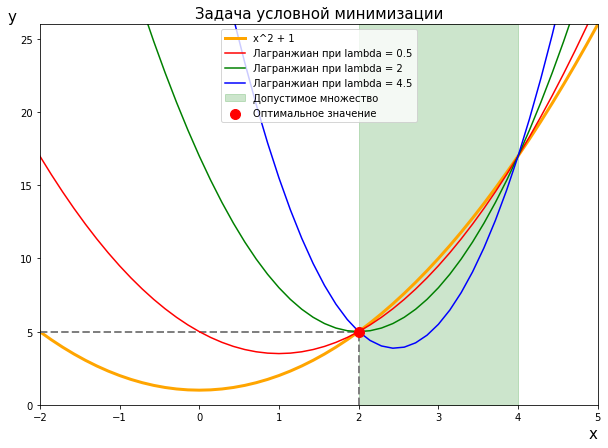

In [169]:
fig, ax = plt.subplots(figsize = [10, 7])
ax.set_xlim((xliml, xlimr))
ax.set_ylim((ylimd, ylimu))
ax.plot(grid, min_func_values, linewidth = 3, color = 'orange', label = 'x^2 + 1')
ax.fill_betweenx(
    y = np.arange(ylimd, ylimu + 1),
    x1 = 2,
    x2 = 4,
    color = 'green',
    alpha= 0.2,
    label = 'Допустимое множество'
)
ax.scatter(x_opt, y_opt, s = 100, marker = 'o', color = 'red', zorder = 10, label = 'Оптимальное значение')
ax.plot(np.repeat(x_opt, 50), np.linspace(ylimd, y_opt, 50), linestyle = '--', linewidth = 2, color = 'grey')
ax.plot(np.linspace(xliml, x_opt, 50), np.repeat(y_opt, 50), linestyle = '--', linewidth = 2, color = 'grey')
ax.plot(grid, lagrangian(grid, 0.5), label = 'Лагранжиан при lambda = 0.5', color = 'red')
ax.plot(grid, lagrangian(grid, 2), label = 'Лагранжиан при lambda = 2', color = 'green')
ax.plot(grid, lagrangian(grid, 4.5), label = 'Лагранжиан при lambda = 4.5', color = 'blue')
plt.title('Задача условной минимизации', size = 15)
plt.xlabel('x', size = 15, loc = 'right')
plt.ylabel('y', size = 15, loc = 'top', rotation = 0)
ax.legend()
plt.show()

На графике видно, что минимумы лагранжианов лежат не выше решения прямой задачи, причём можно заметить, что точки минимумов лагранжиана лежат левее по оси абсцисс если $\lambda < 2$ и правее если $\lambda > 2$. В следующих пунктах будет показано, что действительно, $\lambda^* = 2$. Пока можно говорить, что неравенство $f(x_*) \le \inf_xL(x, \lambda)$ выполнено.

Найдём минимум лагранжиана по $x$

$$\frac{dL(x, \lambda)}{dx} = 2x + 2\lambda x - 6\lambda = 0$$

$$(2 + 2\lambda)x = 6\lambda$$

$$x = \frac{3\lambda}{1 + \lambda}$$

Подставим наденное выражение в лагранжиан и запишем двойственную функцию

$$g(\lambda) = \inf_xL(x, \lambda) = \frac{9\lambda^2}{(1+\lambda)^2} + 1 + \lambda \bigg(\frac{9\lambda^2}{(1+\lambda)^2} - \frac{18\lambda}{1 + \lambda} + 8\bigg) =$$

$$= \frac{(1+\lambda)9\lambda^2}{(1+\lambda)^2} - \frac{18\lambda^2}{1 + \lambda} + 8\lambda + 1 =$$

$$= \frac{9\lambda^2}{1+\lambda} - \frac{18\lambda^2}{1 + \lambda} + 8\lambda + 1 =$$

$$= - \frac{9\lambda^2}{1+\lambda} + 8\lambda + 1$$

In [5]:
def g(lambda_):
    return - 9 * lambda_**2 / (1 + lambda_) + 8 * lambda_ + 1

In [28]:
xliml2, xlimr2 = -10, 10

grid2 = np.linspace(xliml2, xlimr2, 100)

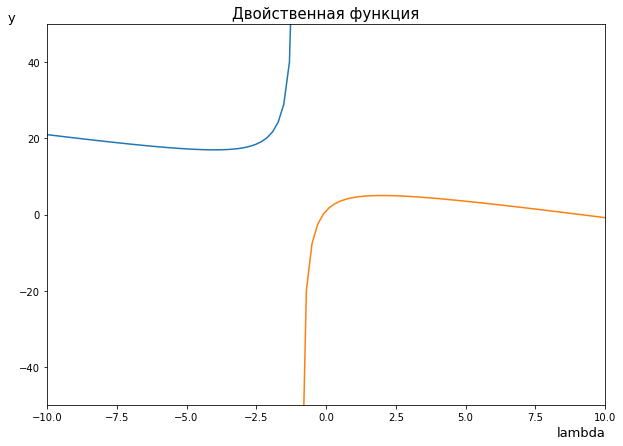

In [60]:
fig2, ax = plt.subplots(figsize = [10, 7])
ax.set_xlim((xliml2, xlimr2))
ax.set_ylim((-50, 50))
ax.plot(grid2[grid2 <-1], g(grid2[grid2 <-1]))
ax.plot(grid2[grid2 >-1], g(grid2[grid2 >-1]))
plt.title('Двойственная функция', size = 15)
plt.xlabel('lambda', size = 13, loc = 'right')
plt.ylabel('y', size = 13, loc = 'top', rotation = 0)
plt.show()

**3)** Двойственная задача:

$$- \frac{9\lambda^2}{1+\lambda} + 8\lambda + 1 \rightarrow \max_\lambda$$
$$\lambda \ge 0$$

Максимизируем функцию

$$\frac{dg(\lambda)}{d\lambda} = - \frac{18\lambda(1 + \lambda) - 9\lambda^2}{(1 + \lambda)^2} + 8 = 0$$

$$-18\lambda(1 + \lambda) + 9\lambda^2 = -8 (1 + \lambda)^2$$

$$-18\lambda - 18\lambda^2 + 9\lambda^2 = -8(1 + 2\lambda + \lambda^2)$$

$$-18\lambda - 9\lambda^2 = -8 - 16\lambda - 8\lambda^2$$

$$\lambda^2 + 2\lambda - 8 = 0$$

По формулам Виета получаем корни $\lambda_1 = 2$ и $\lambda_2 = -4$. Отметим, что двойственная функция имеет "гиперболический" вид - $\lambda \neq -1$, а функция выпукла вниз слева от этой координаты и выпукла вверх справа от неё. Первый корень соответствует локальному максимуму функции в интервале $(-1; +\infty)$, а второй локальному минимуму в интервале $(-\infty; -1)$.

Заметим, что первый корень удовлетворяет условию $\lambda \ge 0$. Очевидно, что условный максимум двойственной задачи будет совпадать с этой точкой. Соответственно, решением двойственной задачи и будет $\lambda^* = 2$ и $g(\lambda^*) = 5$. Строгая двойственность выполнена.

**4)** $$(x - 2)(x - 4) \le u$$

$$x^2 - 4x - 2x + 8 \le u$$

$$x^2 - 6x + 8 \le u$$

$$x^2 - 6x + 8 - u\le 0$$

$$x^2 - 6x + 8 - u \le 0$$

$$D = b^2 - 4ac = 36 - 4(8-u) = 36 - 32 + 4u = 4 + 4u$$

$$x = \frac{6 \pm \sqrt{4(1 + u)}}{2} = 3 \pm \sqrt{1+u}$$

Между этими двумя точками расположены все удовлетворяющие неравенству $x^\prime$. В случае $u = 0$ это будет то же самое множество, что и в первом пункте. 

Если $u$ будет уменьшаться, то множество будет сужаться, пока $u$ не станет меньше -1 - в таком случае парабола $x^2 - 6x + 8 - u$ будет лежать полностью выше оси абсцисс. В пограничном случае $u = -1$ удовлетворять условию будет только точка $x^\prime = 3$. Помня решение первого пункта, можно сказать, что во всех этих случаях оптимальным решением задачи будет доступная точка, ближайшая к нулю, то есть $x_* = 3 - \sqrt{1+u}$

Если $u$ увеличивать, то множество доступных значений будет расширяться. В таком случае решением задачи всё так же будет точка, ближайшая к нулю - но только до тех пор, пока не будет выполнено равенство $x_* = 3 - \sqrt{1+u} = 0$ - в этой точке минимизируемая функция достигает своего глобального минимума и при дальнейшем увеличении $u$ этот минимум будет оставаться решением оптимизационной задачи, так как будет входить во множество доступных $x^\prime$. Найдём $u$ при котором происходит этот  переход

$$3 - \sqrt{1+u} = 0$$

$$\sqrt{1+u} = 3$$

$$1 + u = 9$$

$$u = 8$$

Таким образом, функция $f_u(x_*)$ будет принимать следующие значения

$$(3 - \sqrt{1+u})^2 + 1, -1 \le u < 8$$
$$1, u \ge 8$$

In [42]:
def f_u(u):
    if np.any(u) < -1:
        raise('No solution!')
    return np.select([u < 8, u >= 8], [min_func(3 - np.sqrt(1 + u)), 1])

In [56]:
xliml, xlimr = -1, 10

grid_u = np.linspace(-1, 10, 1000)

f_u_values = f_u(grid_u)

ylimd, ylimu = min(f_u_values) - 1, max(f_u_values)

u_our, y_our = 0, 5

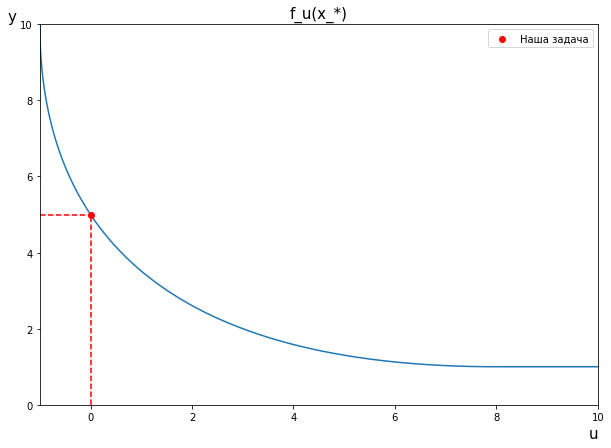

In [65]:
fig, ax = plt.subplots(figsize = [10, 7])
ax.set_xlim((xliml, xlimr))
ax.set_ylim((ylimd, ylimu))
ax.plot(grid_u, f_u_values)
ax.scatter(0, 5, color = 'red', zorder = 10, label = 'Наша задача')
ax.plot(np.linspace(xliml, u_our, 50), np.repeat(y_our, 50), linestyle = '--', color = 'red')
ax.plot(np.repeat(u_our, 50), np.linspace(ylimd, y_our, 50), linestyle = '--', color = 'red')
ax.legend()
plt.title('f_u(x_*)', size = 15)
plt.xlabel('u', size = 15, loc = 'right')
plt.ylabel('y', size = 15, loc = 'top', rotation = 0)
plt.show()

Производная данной функции при $u \ge 8$ будет равна 0, так как функция станет константной. Найдем производную на оставшейся части области допустимых значений 

$$\frac{df_u(x_*)}{du} = 2(3 - \sqrt{1 + u}) \times (-0.5(1+u)^{-0.5}) =$$

$$= (- 3 + \sqrt{1 + u}) \times (1+u)^{-0.5} =$$

$$= 1 - \frac{3}{\sqrt{1+u}}$$

Теперь нужно понять, как $\lambda$ изменяется в зависимости от $u$. При корректировке изначального лагранжиана из пункта 1 на $u$ двойственная задача изменится не сильно

$$- \frac{9\lambda^2}{1+\lambda} + (8 - u)\lambda + 1 \rightarrow \max_\lambda$$
$$\lambda \ge 0$$

Снова проверим, не входит ли точка локального максимума в область допустимых значений - приравняем к нулю производную двойственной функции

$$\frac{dg(\lambda)}{d\lambda} = - \frac{18\lambda(1 + \lambda) - 9\lambda^2}{(1 + \lambda)^2} + 8 - u = 0$$

$$-18\lambda(1 + \lambda) + 9\lambda^2 = (-8 +u) (1 + \lambda)^2$$

$$-18\lambda - 18\lambda^2 + 9\lambda^2 = (-8 + u)(1 + 2\lambda + \lambda^2)$$

$$-18\lambda - 9\lambda^2 = -8 - 16\lambda - 8\lambda^2 + u + 2u\lambda + u\lambda^2$$

$$-2\lambda - 2u\lambda - \lambda^2 - u\lambda^2 + 8 - u = 0$$

$$-2(1 + u)\lambda - (1+u)\lambda^2 + 8 - u = 0$$

Отметим, что это парабола ветками, выпуклая вверх - левее левого корня и правее правого корня производная будет меньше нуля, и функция будет убывать.

$$\lambda = \frac{2(1+u) \pm \sqrt{(2(1+u))^2 + 4(1+u)(8-u)}}{-2(1+u)}$$

$$\lambda = - 1 \pm \frac{\sqrt{(1+u)^2 + 8 - u + 8u -u^2}}{-(1+u)}$$

$$\lambda = - 1 \pm \frac{\sqrt{1+2u + u^2 + 8 - u + 8u -u^2}}{-(1+u)}$$

$$\lambda = - 1 \pm \frac{\sqrt{9 + 9u}}{-(1+u)}$$

$$\lambda = - 1 \pm \frac{3\sqrt{1 + u}}{-(1+u)}$$

$$\lambda = - 1 \mp \frac{3}{\sqrt{1 + u}}$$

Отметим, что для $u = -1$ равенство работать не будет - это самое начало области допустимых значений функции $f_u(x_*)$ на графике выше, в нём производная не существует. В плане двойственной функции - мы всё ещё имеем дело с "гиперболической" функцией, которая не определена при $\lambda = -1$ и выпукла вверх справа от этой координаты. Максимум функции будет находиться там. Так как пока мы ищем производную для $-1 < u < 8$, то можно заметить, что корень с плюсом в середине будет при этих значениях будет положителен, то есть удовлетворять условию двойственной задачи. Значит, корень

$$\lambda^* = - 1 + \frac{3}{\sqrt{1 + u}}$$

является решением двойственной задачи, выраженным через $u$. Получается, что для $-1 < u \le 8$ доказано

$$\frac{df_u(x_*)}{du} = 1 - \frac{3}{\sqrt{1+u}} = - \lambda^*$$

Теперь для $u > 8$. В этом случае у производной двойственной функции не будет положительных корней - экстремумы будут достигаться в точках, не удовлетворяющих условию двойственной задачи. Тем не менее "гиперболическая" форма функции сохранится - справа от $\lambda = -1$ она будет выпукла вверх. В ситуации, когда максимум находится слева от оси ординат, наибольшего значения справа от оси функция будет достигать при $\lambda^* = 0$ и далее только убывать. Это и будет условный максимум двойственной функции. Получается, что для $u > 8$ доказано

$$\frac{df_u(x_*)}{du} = 0 = - \lambda^*$$

**Задача 3**

$$K(x,z) = \cos(x - z) =$$

Разложим косинус разности

$$= \cos x\cos z + \sin x\sin z =$$

Это можно представить в виде скалярного произведения

$$= <(\cos x, \sin x), (\cos z, \sin z)>$$

Функция представима в виде скалярного произведения в некотором пространстве - это ядро.

**Задача 4**

$$9 - 6\sqrt{1+u} + 1 + u + 1 + 9\lambda - 6\lambda\sqrt{1+u} + \lambda + \lambda u - 18\lambda + 6\lambda\sqrt{1+u} + 8\lambda - \lambda u$$

$$K(x, z) = \frac{1}{1+e^{-xz}}$$

Проверим условия теоремы Мерсера. Видно, что если поменять местами $x$ и $z$, то результат останется тем же - функция симметрична. 

Расмотрим призвольную выборку $\{x_i\}_{i = 1}^{l}$ и образованную ей матрицу $K = \bigg(\frac{1}{1+e^{-x_iz_j}}\bigg)_{i,j=0}^l$.

Для матрицы такого вида существуют конечные выборки, при которых определитель матрицы будет отрицательным и второе условие теоремы Мерсера не выполниится. Например, рассмотрим небольшую выборку $(1, 5)$. Для неё матрица $K$ будет иметь следующий вид

$$\begin{pmatrix}
0.73 & 0.99\\
0.99 & 1
\end{pmatrix}$$

и её определитель будет равен -0.2556. Значит, данная функция ядром не является.

**Задача 5**

$$K_1(x,z) = (1 + xz)^2 =$$

$$= 1 + 2xz + x^2z^2 =$$

$$= <(1, \sqrt{2}x, x^2), (1, \sqrt{2}z, z^2)>$$

Спрямляющим пространством первого ядра будет $(1, \sqrt{2}x, x^2)$

$$K_2(x,z) = (1 + xz + x^2z^2) =$$

$$= <(1, x, x^2), (1, z, z^2)>$$

Спрямляющим просранством второго ядра будет $(1, x, x^2)$

$$K_1(x,z) + K_2(x,z) = 1 + 2xz + x^2z^2 + 1 + xz + x^2z^2 =$$

$$= 2 + 3xz + 2x^2z^2 =$$

$$= <(\sqrt{2}, \sqrt{3}x, \sqrt{2}x^2), (\sqrt{2}, \sqrt{3}z, \sqrt{2}z^2)>$$ 

Спрямляющим пространством суммы ядер будет $(\sqrt{2}, \sqrt{3}x, \sqrt{2}x^2)$